<h1>Results

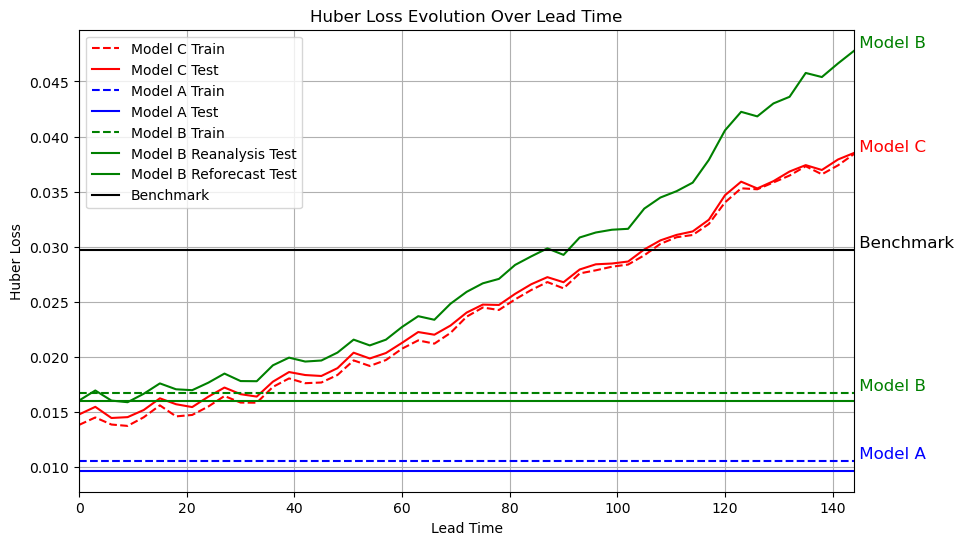

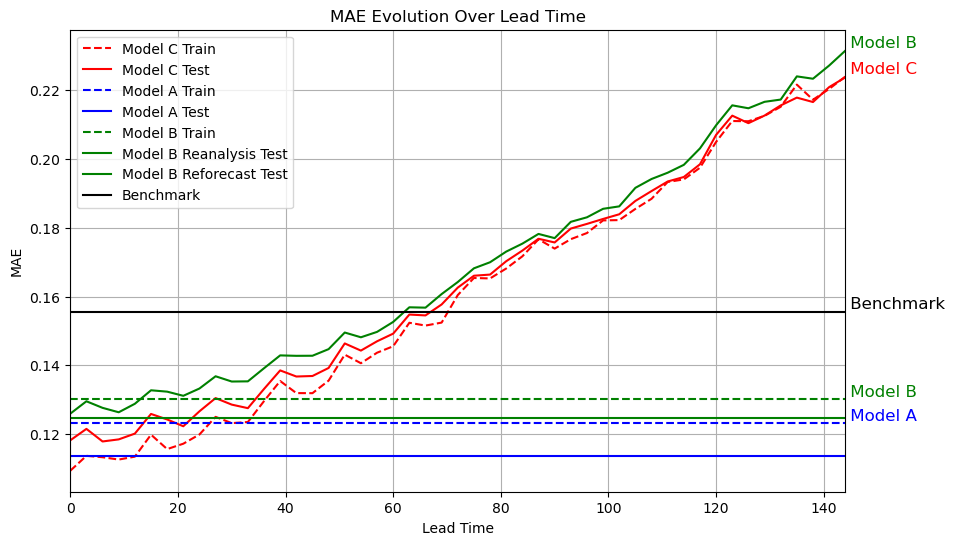

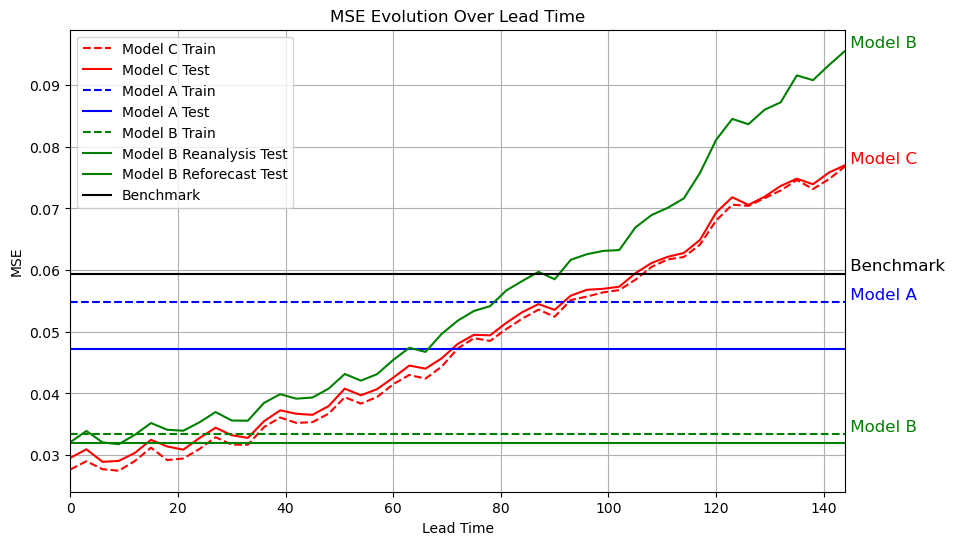

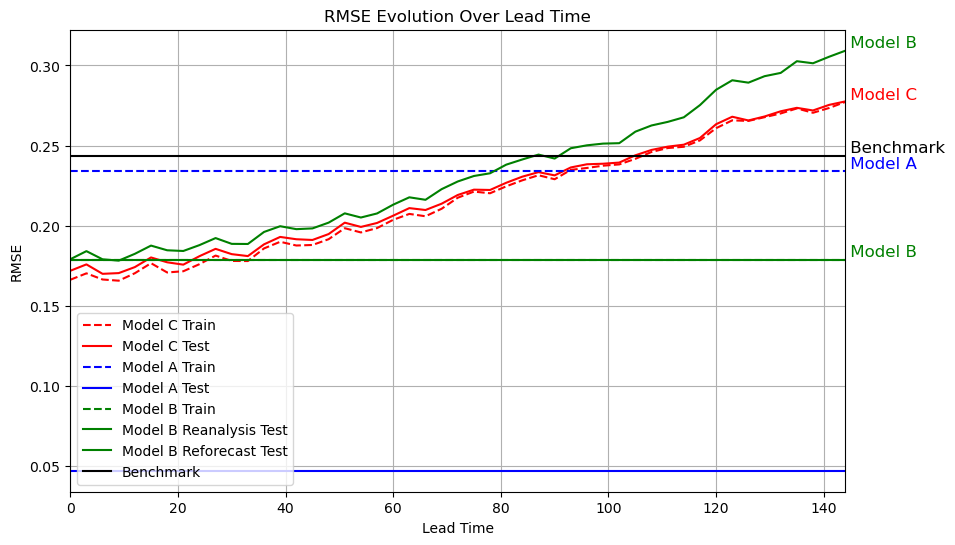

In [12]:
import joblib
import matplotlib.pyplot as plt
import os

# Allow duplicate OpenMP instances (prevents crashes on some systems)
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Model A
metrics_model_A = joblib.load("modelA/parameters1_standard/metrics.pkl")
# training
model_A_huber_train = metrics_model_A["Training"]["normalised"]["Huber"]
model_A_mae_train = metrics_model_A["Training"]["normalised"]["MAE"]
model_A_mse_train = metrics_model_A["Training"]["normalised"]["MSE"]
model_A_rmse_train = metrics_model_A["Training"]["normalised"]["RMSE"]
# testing
model_A_huber_test = metrics_model_A["Testing"]["normalised"]["Huber"]
model_A_mae_test = metrics_model_A["Testing"]["normalised"]["MAE"]
model_A_mse_test = metrics_model_A["Testing"]["normalised"]["MSE"]
model_A_rmse_test = metrics_model_A["Testing"]["normalised"]["MSE"]

# Model B
metrics_model_B_reanalysis = joblib.load("modelB/parameters/metrics.pkl")
# training
model_B_huber_train = metrics_model_B_reanalysis["Training"]["Huber"]
model_B_mae_train = metrics_model_B_reanalysis["Training"]["MAE"]
model_B_mse_train = metrics_model_B_reanalysis["Training"]["MSE"]
model_B_rmse_train = metrics_model_B_reanalysis["Training"]["RMSE"]
# tested on reanalysis data
model_B_reanalysis_huber_test = metrics_model_B_reanalysis["Testing"]["Huber"]
model_B_reanalysis_mae_test = metrics_model_B_reanalysis["Testing"]["MAE"]
model_B_reanalysis_mse_test = metrics_model_B_reanalysis["Testing"]["MSE"]
model_B_reanalysis_rmse_test = metrics_model_B_reanalysis["Testing"]["RMSE"]
# tested on reforecast data
metrics_model_B_reforecast = joblib.load("modelB/metrics_reforecast/metrics.pkl")
lead_times = sorted([key for key in metrics_model_B_reforecast.keys()])
model_B_reforecast_huber_test = [metrics_model_B_reforecast[lt]["Huber"] for lt in lead_times]
model_B_reforecast_mae_test = [metrics_model_B_reforecast[lt]["MAE"] for lt in lead_times]
model_B_reforecast_mse_test = [metrics_model_B_reforecast[lt]["MSE"] for lt in lead_times]
model_B_reforecast_rmse_test = [metrics_model_B_reforecast[lt]["RMSE"] for lt in lead_times]

# Model C (loaded from files)
metrics_model_C = joblib.load("modelC/parameters/metrics.pkl")
lead_times = sorted([key for key in metrics_model_C.keys()])
# training
model_C_huber_test = [metrics_model_C[lt]["Training"]["Huber"] for lt in lead_times]
model_C_mae_test = [metrics_model_C[lt]["Training"]["MAE"] for lt in lead_times]
model_C_mse_test = [metrics_model_C[lt]["Training"]["MSE"] for lt in lead_times]
model_C_rmse_test = [metrics_model_C[lt]["Training"]["RMSE"] for lt in lead_times]
# testing
model_C_huber_train = [metrics_model_C[lt]["Testing"]["Huber"] for lt in lead_times]
model_C_mae_train = [metrics_model_C[lt]["Testing"]["MAE"] for lt in lead_times]
model_C_mse_train = [metrics_model_C[lt]["Testing"]["MSE"] for lt in lead_times]
model_C_rmse_train = [metrics_model_C[lt]["Testing"]["RMSE"] for lt in lead_times]

# Benchmark values
metrics_benchmark = joblib.load("Benchmark/metrics/metrics_benchmark_2.pkl")
benchmark_huber = metrics_benchmark["Huber"]
benchmark_mae = metrics_benchmark["MAE"]
benchmark_mse = metrics_benchmark["MSE"]
benchmark_rmse = metrics_benchmark["RMSE"]

# Function for plotting loss evolution
def plot_loss_evolution(train_metrics, test_metrics, model_a_train, model_a_test,
                        model_b_train, model_b_reanalysis_test, model_b_reforecast_test, benchmark, ylabel, title):

    plt.figure(figsize=(10, 6))
    
    # Model C (Train and Test)
    plt.plot(lead_times, train_metrics, color="red", linestyle="dashed", label="Model C Train")
    plt.plot(lead_times, test_metrics, color="red", linestyle="solid", label="Model C Test")

    # Model A
    plt.axhline(y=model_a_train, color="blue", linestyle="dashed", label="Model A Train")
    plt.axhline(y=model_a_test, color="blue", linestyle="solid", label="Model A Test")

    # Model B
    plt.axhline(y=model_b_train, color="green", linestyle="dashed", label="Model B Train")
    plt.axhline(y=model_b_reanalysis_test, color="green", linestyle="solid", label="Model B Reanalysis Test")
    plt.plot(lead_times, model_b_reforecast_test, color="green", linestyle="solid", label="Model B Reforecast Test")

    # Benchmark
    plt.axhline(y=benchmark, color="black", linestyle="solid", label="Benchmark")

    # Add text labels near each line
    plt.text(lead_times[-1], train_metrics[-1], " Model C", color="red", fontsize=12, verticalalignment='bottom')
    plt.text(lead_times[-1], model_a_train, " Model A", color="blue", fontsize=12, verticalalignment='bottom')
    plt.text(lead_times[-1], model_b_train, " Model B", color="green", fontsize=12, verticalalignment='bottom')
    plt.text(lead_times[-1], model_b_reforecast_test[-1], " Model B", color="green", fontsize=12, verticalalignment='bottom')
    plt.text(lead_times[-1], benchmark, " Benchmark", color="black", fontsize=12, verticalalignment='bottom')

    # Add simplified legend for only "Train" and "Test" labels
    # plt.plot([], [], linestyle="dashed", color="black", label="Train")
    # plt.plot([], [], linestyle="solid", color="black", label="Test")
    plt.legend() # remove labels and uncomment previous two lines to only show "Train" and "Test" in legend

    # Formatting
    plt.xlabel("Lead Time")
    plt.ylabel(ylabel)
    plt.xlim(0, 144)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot Huber Loss
plot_loss_evolution(model_C_huber_train, model_C_huber_test, model_A_huber_train, model_A_huber_test,
                    model_B_huber_train, model_B_reanalysis_huber_test, model_B_reforecast_huber_test, benchmark_huber,
                    "Huber Loss", "Huber Loss Evolution Over Lead Time")

# Plot MAE Loss
plot_loss_evolution(model_C_mae_train, model_C_mae_test, model_A_mae_train, model_A_mae_test,
                    model_B_mae_train, model_B_reanalysis_mae_test, model_B_reforecast_mae_test, benchmark_mae,
                    "MAE", "MAE Evolution Over Lead Time")

# Plot MSE Loss
plot_loss_evolution(model_C_mse_train, model_C_mse_test, model_A_mse_train, model_A_mse_test,
                    model_B_mse_train, model_B_reanalysis_mse_test, model_B_reforecast_mse_test, benchmark_mse,
                    "MSE", "MSE Evolution Over Lead Time")

# Plot RMSE Loss
plot_loss_evolution(model_C_rmse_train, model_C_rmse_test, model_A_rmse_train, model_A_rmse_test,
                    model_B_rmse_train, model_B_reanalysis_rmse_test, model_B_reforecast_rmse_test, benchmark_rmse,
                    "RMSE", "RMSE Evolution Over Lead Time")